In [100]:
import pandas as pd
import numpy as np
#pip3 install biopython #blast하기 위해 fasta file 만들 때 사용
from Bio.Blast.Applications import NcbiblastpCommandline
from Bio.Blast import NCBIXML
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
# pip install scikit-bio #blast result 불러올 때 사용
from io import StringIO
import skbio.io
#tree 그릴때 사용
from Bio import Phylo
import matplotlib
import matplotlib.pyplot as plt

**한 품종의 file과 reference file간의 annotation을 통해 sequence 지정 후 protein 서열로 만들기**<br>
cds 때처럼 phythozome에서 annotation, assembly file 다운

* Gmax

In [2]:
#Gmax file

df_Gmax = pd.read_csv('./Gmax/Wm82.a2.v1/annotation/Gmax_275_Wm82.a2.v1.gene.gff3', sep='\t', comment = '#', header = None)

In [3]:
df_Gmax.head()

,0,1,2,3,4,5,6,7,8
0,Chr01,phytozomev10,gene,27355,28320,.,-,.,ID=Glyma.01G000100.Wm82.a2.v1;Name=Glyma.01G00...
1,Chr01,phytozomev10,mRNA,27355,28320,.,-,.,ID=Glyma.01G000100.1.Wm82.a2.v1;Name=Glyma.01G...
2,Chr01,phytozomev10,CDS,28139,28218,.,-,0,ID=Glyma.01G000100.1.Wm82.a2.v1.CDS.1;Parent=G...
3,Chr01,phytozomev10,five_prime_UTR,28219,28320,.,-,.,ID=Glyma.01G000100.1.Wm82.a2.v1.five_prime_UTR...
4,Chr01,phytozomev10,CDS,27926,27991,.,-,1,ID=Glyma.01G000100.1.Wm82.a2.v1.CDS.2;Parent=G...


In [4]:
#Gmax reference file
#서버에 올릴 때 용량만큼 다 올라갈때까지 기다리고 gzip을 해주어야 했다. 아니면 에러가 자꾸 뜨니 주의! (ll -h로 파일 용량 확인 가능)

ref_Gmax = open('./Gmax/Wm82.a2.v1/assembly/Gmax_275_v2.0.fa')

In [5]:
ref_Gmax_read = ref_Gmax.read()

In [6]:
ref_Gmax_read[0:1000]

'>Chr01\nGGTTTGGTGTTTGGGTTTTAGGTTTTAGGTTTTAGGTTTTACGGTTTAGGGTTTATGGTTTATGGTTTAGGGTTTAGGGT\nTAGGAAATAATTTGGGTCTTTCATCTTTCAACAAAAAATTAAGGGATTTAGAGTAATTTTTAGGGTTTAGGGTTTAAGGT\nTTTAGGTTTCGGGTTTGGGTTTTAGATTTTACGGCTTACGGTTTAAAGTTTAGGGGTTAGGGTTTAGGGTTTAGAAATAA\nATTTGAGTGTTTGACATTTGAACACAAAATTAAGGCATTTAGAGTCATTTTTAGGGTTTACGGTTTAGGGTTTAGCAAGA\nAATTTCGGTGTTTCATCTTCGAACACAAAATTAAGGCAGTTAAAGTCTTTTTTTGGGTTTAGGGTTTAGGGTTATTTGCC\nTGGGTGTGCCAGTGGCGTGAGCAAATGGAGGGCGGCCATTTCTCATGTTTGGACGTCAAAGAACCCATAAAAAATAGTCC\nTGTTCCCCGGTTTCGTCAACTAACACGTAAAAACAATGCCTTAACACAAAATTAAGGCATTTAGAGGCATTTTTAGGGTT\nTACGGTTTAGGGTTTACCAAGAAATTTCGGTGTTTCATCTTTGAACACAAAATTAAGGCAGTTAAAGTCTTTTTTTGGGT\nTTAGGGTTTAGGGTTTGAGATTTATGGTTTAGGGTTTAGGGTTCTTTGCCTGGGTGTGCCAGTGGCGGGAGAAAATGGAG\nGGCGGCCATTTCTCATGTTTGCATGTCAAAGAACCCAAAAAAAATAGTCCCGTTCCCCGGTTCCGTCAACTAACACGTAA\nAAACAAAGCCTGAAAATCAAAAAACTTAGGAAATCGACCATTTTCCATGTTCAATTACCCATGTTTGGGATTTTTTTGCG\nTGGGTGTGCCGGTGGCGTGAGACCATGGAGGGCGGCCATTTATCATGTTTGGACGTCAAAGAACGAAATAAAAATAGTCT\nCGTTCCC

In [7]:
ref_Gmax_list = ref_Gmax_read.split('>')

In [8]:
ref_Gmax_list[1][0:100]

'Chr01\nGGTTTGGTGTTTGGGTTTTAGGTTTTAGGTTTTAGGTTTTACGGTTTAGGGTTTATGGTTTATGGTTTAGGGTTTAGGGT\nTAGGAAATAATTT'

In [9]:
ref_Gmax_list[1][0:100].split('\n')[0]

'Chr01'

In [10]:
ref_Gmax_list[0]

''

In [11]:
#ID가 key, sequence가 value인 dictionary 만들기

ref_dic = {}

for x in ref_Gmax_list[1:] :
    key = x.split('\n')[0].split()[0]
    value = ''.join(x.split('\n')[1:])
    ref_dic[key] = value

In [12]:
ref_dic['Chr01'][0:500]

'GGTTTGGTGTTTGGGTTTTAGGTTTTAGGTTTTAGGTTTTACGGTTTAGGGTTTATGGTTTATGGTTTAGGGTTTAGGGTTAGGAAATAATTTGGGTCTTTCATCTTTCAACAAAAAATTAAGGGATTTAGAGTAATTTTTAGGGTTTAGGGTTTAAGGTTTTAGGTTTCGGGTTTGGGTTTTAGATTTTACGGCTTACGGTTTAAAGTTTAGGGGTTAGGGTTTAGGGTTTAGAAATAAATTTGAGTGTTTGACATTTGAACACAAAATTAAGGCATTTAGAGTCATTTTTAGGGTTTACGGTTTAGGGTTTAGCAAGAAATTTCGGTGTTTCATCTTCGAACACAAAATTAAGGCAGTTAAAGTCTTTTTTTGGGTTTAGGGTTTAGGGTTATTTGCCTGGGTGTGCCAGTGGCGTGAGCAAATGGAGGGCGGCCATTTCTCATGTTTGGACGTCAAAGAACCCATAAAAAATAGTCCTGTTCCCCGGTTTCGTCAAC'

In [13]:
#protein 서열로 바꿔주기위해 CDS 부분만 남기기
#masking과 동일

CDS_only = np.where(df_Gmax[2] == 'CDS')
#m = df_Gmax[2] == 'CDS'

In [14]:
CDS_only_df = df_Gmax.iloc[CDS_only]
#CDS_only_df = df_Gmax[m]

In [15]:
CDS_only_df.head()

,0,1,2,3,4,5,6,7,8
2,Chr01,phytozomev10,CDS,28139,28218,.,-,0,ID=Glyma.01G000100.1.Wm82.a2.v1.CDS.1;Parent=G...
4,Chr01,phytozomev10,CDS,27926,27991,.,-,1,ID=Glyma.01G000100.1.Wm82.a2.v1.CDS.2;Parent=G...
6,Chr01,phytozomev10,CDS,27656,27824,.,-,1,ID=Glyma.01G000100.1.Wm82.a2.v1.CDS.3;Parent=G...
13,Chr01,phytozomev10,CDS,64055,64061,.,-,0,ID=Glyma.01G000200.1.Wm82.a2.v1.CDS.1;Parent=G...
15,Chr01,phytozomev10,CDS,63334,63417,.,-,2,ID=Glyma.01G000200.1.Wm82.a2.v1.CDS.2;Parent=G...


In [19]:
#dataframe의 0번째에 있는 ID와 reference dictionary의 key인 reference ID를 참조하여 sequence 지정
#dataframe의 3번째와 4번째에 있는 위치 참조하여 reference 서열 이용

ref_dic['Chr01'][28139-1:28218]

'CTGTGGAAATTGGCATTGGCATTAATGGAACTCTCAATCTCAACCATACAGTCCATTTGCTCATGTTGTGCTACACACAT'

In [20]:
CDS_only_df['seq'] = CDS_only_df.apply(lambda x : ref_dic[x[0]][x[3]-1 : x[4]], axis = 1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
#sequence가 seq이란 이름의 column으로 생성됨

CDS_only_df.head()

,0,1,2,3,4,5,6,7,8,seq
2,Chr01,phytozomev10,CDS,28139,28218,.,-,0,ID=Glyma.01G000100.1.Wm82.a2.v1.CDS.1;Parent=G...,CTGTGGAAATTGGCATTGGCATTAATGGAACTCTCAATCTCAACCA...
4,Chr01,phytozomev10,CDS,27926,27991,.,-,1,ID=Glyma.01G000100.1.Wm82.a2.v1.CDS.2;Parent=G...,CTATATTTAGAACACTGTATTTCACGGATTTTGTATAAATAGAACT...
6,Chr01,phytozomev10,CDS,27656,27824,.,-,1,ID=Glyma.01G000100.1.Wm82.a2.v1.CDS.3;Parent=G...,TTAATGTAAAGCAAGATACAAGACATGATATAACATGAAACTGATA...
13,Chr01,phytozomev10,CDS,64055,64061,.,-,0,ID=Glyma.01G000200.1.Wm82.a2.v1.CDS.1;Parent=G...,CTTTCAT
15,Chr01,phytozomev10,CDS,63334,63417,.,-,2,ID=Glyma.01G000200.1.Wm82.a2.v1.CDS.2;Parent=G...,CAGGTCCCATGCTCTCACTGTCTGGATTATTGGAGGCGTGCCCCCA...


In [22]:
#dataframe의 8번째에 있는 gene name 따오기

CDS_only_df[8][2].split('.')[1]

'01G000100'

In [23]:
CDS_only_df['ID'] = [x.split('.')[1] for x in CDS_only_df[8]]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
#gene name이 ID라는 이름의 column으로 생성됨

CDS_only_df.head()

,0,1,2,3,4,5,6,7,8,seq,ID
2,Chr01,phytozomev10,CDS,28139,28218,.,-,0,ID=Glyma.01G000100.1.Wm82.a2.v1.CDS.1;Parent=G...,CTGTGGAAATTGGCATTGGCATTAATGGAACTCTCAATCTCAACCA...,01G000100
4,Chr01,phytozomev10,CDS,27926,27991,.,-,1,ID=Glyma.01G000100.1.Wm82.a2.v1.CDS.2;Parent=G...,CTATATTTAGAACACTGTATTTCACGGATTTTGTATAAATAGAACT...,01G000100
6,Chr01,phytozomev10,CDS,27656,27824,.,-,1,ID=Glyma.01G000100.1.Wm82.a2.v1.CDS.3;Parent=G...,TTAATGTAAAGCAAGATACAAGACATGATATAACATGAAACTGATA...,01G000100
13,Chr01,phytozomev10,CDS,64055,64061,.,-,0,ID=Glyma.01G000200.1.Wm82.a2.v1.CDS.1;Parent=G...,CTTTCAT,01G000200
15,Chr01,phytozomev10,CDS,63334,63417,.,-,2,ID=Glyma.01G000200.1.Wm82.a2.v1.CDS.2;Parent=G...,CAGGTCCCATGCTCTCACTGTCTGGATTATTGGAGGCGTGCCCCCA...,01G000200


In [25]:
#sense rna, antisense rna 구분
#masking과 동일

CDS_plus_only  = np.where(CDS_only_df[6] == '+')
CDS_minus_only = np.where(CDS_only_df[6] == '-')
#m_plus  = CDS_only_df[6] == '+'
#m_minus = CDS_only_df[6] == '-'

In [26]:
CDS_plus_only_df  = CDS_only_df.iloc[CDS_plus_only]
CDS_minus_only_df = CDS_only_df.iloc[CDS_minus_only]
#CDS_plus_only_df  = CDS_only_df[m_plus]
#CDS_minus_only_df = CDS_only_df[m_minus]

In [29]:
#sense rna, 각각의 gene name에 알맞은 CDS가 들어갈 수 있도록 한다.

CDS_dic  = {}

for x in CDS_plus_only_df.values :
    try :
        CDS_dic[x[10]] += x[9]
    except KeyError :
        CDS_dic[x[10]] = x[9]

In [30]:
#antisense는 reverse complementary를 고려

dicC = {'A':'T','G':'C','T':'A','C':'G'}

d = 'ATGC'

print([dicC[x] for x in d]) 
#서열을 하나하나 불러 dicC의 key로 넣어 상보적인 서열을 내놓을 수 있도록 한다.

print([dicC[x] for x in d][::-1])
#antisense이므로 그 상보적인 서열들이 반대로 나오게 된다.

print(''.join([dicC[x] for x in d][::-1]))
#서열화시켜준다.

['T', 'A', 'C', 'G']
['G', 'C', 'A', 'T']
GCAT


In [31]:
#antisense rna, 각각의 gene name에 알맞은 CDS가 들어갈 수 있도록 한다.

dicC = {'A':'T','G':'C','T':'A','C':'G', 'N':'N'}

for x in CDS_minus_only_df.values :
    value = ''.join(dicC[xx] for xx in x[9][::-1])
    try :
        CDS_dic[x[10]] += value
    except KeyError :
        CDS_dic[x[10]] = value

In [32]:
gencode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W',
    'CMC':'P', 'CMC':'H', 'GYG':''}

In [34]:
#RNA 서열들을 protein서열로 만들어준다.

pro_dic  = {}

for x in CDS_dic : #dictionary를 for문으로 받으면 key값이 받아진다.
    cds = CDS_dic[x]
    protein = ''
    for y in range(int(len(cds)/3)) :
        protein += gencode[cds[3*y:3*y+3].upper()]
    pro_dic[x] = protein

KeyError: 'NNN'

In [65]:
#gencode에 없는 서열이 나타나 KeyError가 생겼으므로 그 서열은 N으로 처리해준다.

pro_dic  = {}

for x in CDS_dic :
    cds = CDS_dic[x]
    protein = ''
    for y in range(int(len(cds)/3)) :
        try :
            protein += gencode[cds[3*y:3*y+3].upper()]
        except KeyError :
            protein += 'N'
    pro_dic[x] = protein

* Ppatens

In [35]:
df_Ppatens = pd.read_csv('./Ppatens/v3.3/annotation/Ppatens_318_v3.3.gene.gff3', sep='\t', comment='#',header=None)

In [36]:
ref_Ppatens = open('./Ppatens/v3.3/assembly/Ppatens_318_v3.fa')

In [37]:
ref_Ppatens_read = ref_Ppatens.read()

In [38]:
ref_Ppatens_list = ref_Ppatens_read.split('>')

In [39]:
ref_Ppatens_dic = {}

for x in ref_Ppatens_list :
    key = x.split('\n')[0]
    value = ''.join(x.split('\n')[1:])
    ref_Ppatens_dic[key] = value

In [40]:
df_Ppatens.head()

,0,1,2,3,4,5,6,7,8
0,Chr01,phytozomev10,gene,63062,66241,.,+,.,ID=Pp3c1_100;Name=Pp3c1_100;ancestorIdentifier...
1,Chr01,phytozomev10,mRNA,63062,66241,.,+,.,ID=PAC:32968418;Name=Pp3c1_100V3.1;pacid=32968...
2,Chr01,phytozomev10,five_prime_UTR,63062,63463,.,+,.,ID=PAC:32968418.five_prime_UTR.1;Parent=PAC:32...
3,Chr01,phytozomev10,CDS,63464,63656,.,+,0,ID=PAC:32968418.CDS.1;Parent=PAC:32968418;paci...
4,Chr01,phytozomev10,CDS,64104,64356,.,+,2,ID=PAC:32968418.CDS.2;Parent=PAC:32968418;paci...


In [41]:
m_cds = df_Ppatens[2] == 'CDS'

In [42]:
P_CDS_only_df = df_Ppatens[m_cds]

In [43]:
P_CDS_only_df.head()

,0,1,2,3,4,5,6,7,8
3,Chr01,phytozomev10,CDS,63464,63656,.,+,0,ID=PAC:32968418.CDS.1;Parent=PAC:32968418;paci...
4,Chr01,phytozomev10,CDS,64104,64356,.,+,2,ID=PAC:32968418.CDS.2;Parent=PAC:32968418;paci...
5,Chr01,phytozomev10,CDS,64537,64639,.,+,1,ID=PAC:32968418.CDS.3;Parent=PAC:32968418;paci...
6,Chr01,phytozomev10,CDS,64761,64841,.,+,0,ID=PAC:32968418.CDS.4;Parent=PAC:32968418;paci...
7,Chr01,phytozomev10,CDS,64992,65266,.,+,0,ID=PAC:32968418.CDS.5;Parent=PAC:32968418;paci...


In [44]:
P_CDS_only_df['seq'] = P_CDS_only_df.apply(lambda x : ref_Ppatens_dic[x[0]][x[3]-1:x[4]], axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
#sequence가 seq이란 이름의 column으로 생성됨

P_CDS_only_df.head()

,0,1,2,3,4,5,6,7,8,seq
3,Chr01,phytozomev10,CDS,63464,63656,.,+,0,ID=PAC:32968418.CDS.1;Parent=PAC:32968418;paci...,ATGGGTTACAACGAGGGGCAAGTATTCGCTGCAGAGCTGTTGGGAA...
4,Chr01,phytozomev10,CDS,64104,64356,.,+,2,ID=PAC:32968418.CDS.2;Parent=PAC:32968418;paci...,GTTTCTTCAATCCAGCAGTGGCGCTGGCGGCAGCCGTGGTGGACGA...
5,Chr01,phytozomev10,CDS,64537,64639,.,+,1,ID=PAC:32968418.CDS.3;Parent=PAC:32968418;paci...,GTATGCATCTGCAGGGACGAGGGACAATGTAACGACTGGTAGGGTG...
6,Chr01,phytozomev10,CDS,64761,64841,.,+,0,ID=PAC:32968418.CDS.4;Parent=PAC:32968418;paci...,ATAATGGGATGCGGCAGTCACTCCTCAGAGTTGAAGAAAGAATCGG...
7,Chr01,phytozomev10,CDS,64992,65266,.,+,0,ID=PAC:32968418.CDS.5;Parent=PAC:32968418;paci...,GCAAAGTCGATGAAGTCAGCATGTGGGCCGAGCGTAAAGCAACGAA...


In [47]:
P_CDS_only_df['ID'] = [x.split('=')[3] for x in P_CDS_only_df[8]]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
#gene name이 ID라는 이름의 column으로 생성됨

P_CDS_only_df.head()

,0,1,2,3,4,5,6,7,8,seq,ID
3,Chr01,phytozomev10,CDS,63464,63656,.,+,0,ID=PAC:32968418.CDS.1;Parent=PAC:32968418;paci...,ATGGGTTACAACGAGGGGCAAGTATTCGCTGCAGAGCTGTTGGGAA...,32968418
4,Chr01,phytozomev10,CDS,64104,64356,.,+,2,ID=PAC:32968418.CDS.2;Parent=PAC:32968418;paci...,GTTTCTTCAATCCAGCAGTGGCGCTGGCGGCAGCCGTGGTGGACGA...,32968418
5,Chr01,phytozomev10,CDS,64537,64639,.,+,1,ID=PAC:32968418.CDS.3;Parent=PAC:32968418;paci...,GTATGCATCTGCAGGGACGAGGGACAATGTAACGACTGGTAGGGTG...,32968418
6,Chr01,phytozomev10,CDS,64761,64841,.,+,0,ID=PAC:32968418.CDS.4;Parent=PAC:32968418;paci...,ATAATGGGATGCGGCAGTCACTCCTCAGAGTTGAAGAAAGAATCGG...,32968418
7,Chr01,phytozomev10,CDS,64992,65266,.,+,0,ID=PAC:32968418.CDS.5;Parent=PAC:32968418;paci...,GCAAAGTCGATGAAGTCAGCATGTGGGCCGAGCGTAAAGCAACGAA...,32968418


In [49]:
m_plus  = P_CDS_only_df[6] == '+'
m_minus = P_CDS_only_df[6] == '-'

In [50]:
P_CDS_plus_only_df  = P_CDS_only_df[m_plus]
P_CDS_minus_only_df = P_CDS_only_df[m_minus]

In [51]:
P_CDS_dic = {}

#sense RNA
for x in P_CDS_plus_only_df.values :
    try :
        P_CDS_dic[x[10]] += x[9]
    except KeyError :
        P_CDS_dic[x[10]] = x[9]
        
#antisense RNA
dicC = {'A':'T', 'T':'A', 'G':'C', 'C':'G', 'N':'N'}        
for x in P_CDS_minus_only_df.values :
    value = ''.join(dicC[xx] for xx in x[9][::-1])
    try :
        P_CDS_dic[x[10]] += value
    except KeyError :
        P_CDS_dic[x[10]] = value

In [52]:
gencode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W',
    'CMC':'P', 'CMC':'H', 'GYG':''}

In [53]:
P_pro_dic = {}

for x in P_CDS_dic :
    cds = P_CDS_dic[x]
    protein = ''
    for y in range(int(len(cds)/3)) :
        try :
            protein += gencode[cds[3*y:3*y+3]]
        except KeyError :
            protein += 'N'
    P_pro_dic[x] = protein

**blast**

In [66]:
records = (SeqRecord(Seq(pro_dic[i]), i) for i in (pro_dic))

In [67]:
SeqIO.write(records, './gmax_fasta', "fasta")

56044

In [63]:
P_records = (SeqRecord(Seq(P_pro_dic[i]), i) for i in (P_pro_dic))

In [64]:
SeqIO.write(P_records, './ppatens_fasta', "fasta")

87533

* bash

**root@fed79a2a9873:/data2/HLP/limforest/winter# sudo apt-get update && sudo apt-get -y install python ncbi-blast+**<br>
**root@fed79a2a9873:/data2/HLP/limforest/winter# head gmax_fasta**

`>09G019700 <unknown description>
MRSTPRSKTVTWTLTKLLVVSSHKIKDPTESRSRGSGTNNTSSRGGGRAGTDRNGGRGGA
NQFGSSDYGLQGKPVYKKENGAPTYGGSTSSAPSVLGNNANMRPASYSDSVVTEKTYAFS
IGDGPSSSSQRAGVQSAWAGNTGQVSMADIVKMGRPQARPSMHNSSIQSGNHQNVFMPPA
ASDNNLHSSQGYASKVSETNTNQGHAISDNVPQNDEWPCIENQHDVRVYADVDAHANSEC
YANSSSFAEADWQQKTHLDEHGAEDGSVENADNAESASISAKSTSEDNTGAEDDVSSVAA
NIEQLNIQRDDQGTAQEDDNPSVVIPNHLQLHTPECMNLSFGSFGSANPLSGSGSFTSRP
LKSNLEDTSGAADASTIENSDTRNPDYYGDEHLTTTTSDGNLVQGTGVSAGTYEHTSISQ
EALKPEPPEIAQENQYSFPSHSHGFNYENAQQPEVTFPVSQTSSQNQNLAPFSGVMAHTN
SLPSALLSSPVQTAREDIPYLPFPATQSMPTKYSDIASSIGGSTITMSEALRASGISAPQ`<br>
**root@fed79a2a9873:/data2/HLP/limforest/winter# makeblastdb -in gmax_fasta -dbtype prot**<br>
<br>
<br>
Building a new DB, current time: 01/10/2019 04:48:50<br>
New DB name:   /data2/HLP/limforest/winter/gmax_fasta<br>
New DB title:  gmax_fasta<br>
Sequence type: Protein<br>
Keep Linkouts: T<br>
Keep MBits: T<br>
Maximum file size: 1000000000B<br>
Adding sequences from FASTA; added 56044 sequences in 1.66228 seconds.<br>
**root@fed79a2a9873:/data2/HLP/limforest/winter# blastp -query gmax_fasta -db ppatens_fasta -out gmax_vs_ppatens_blast_results.txt**<br>
**root@fed79a2a9873:/data2/HLP/limforest/winter# less gmax_vs_ppatens_blast_results.txt**<br>
<br>
BLASTP 2.2.31+<br>
<br>
<br>
Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.<br>
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.<br>
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of<br>
protein database search programs", Nucleic Acids Res. 25:3389-3402.<br>
<br>
<br>
Reference for composition-based statistics: Alejandro A. Schaffer,<br>
L. Aravind, Thomas L. Madden, Sergei Shavirin, John L. Spouge, Yuri<br>
I. Wolf, Eugene V. Koonin, and Stephen F. Altschul (2001),<br>
"Improving the accuracy of PSI-BLAST protein database searches with<br>
composition-based statistics and other refinements", Nucleic Acids<br>
Res. 29:2994-3005.<br>
<br>
<br>
<br>
Database: ppatens_fasta<br>
           87,533 sequences; 39,298,806 total letters



`Query= 01G043100 <unknown description>`<br>
<br>
`Length=329`<br>
`                                                                      Score     E`<br>
`Sequences producing significant alignments:                          (Bits)  Value`<br>

`  32939329 <unknown description>                                      195     9e-56`<br>
`  32939328 <unknown description>                                      195     9e-56`<br>
`  32980953 <unknown description>                                      189     3e-54`<br>
`  32904634 <unknown description>                                      188     5e-54`<br>
`  32904633 <unknown description>                                      188     1e-53`<br>
`  32980952 <unknown description>                                      189     1e-53`<br>
`  32935112 <unknown description>                                      181     9e-51`<br>
`  32933878 <unknown description>                                      180     3e-50`

`> 32980953 <unknown description>`<br>
`Length=504`<br>
<br>
` Score = 189 bits (479),  Expect = 3e-54, Method: Compositional matrix adjust.`<br>
` Identities = 127/352 (36%), Positives = 172/352 (49%), Gaps = 56/352 (16%)`<br>
<br>
`Query  3    WVRGDSLGTGSFATVNIAIPTNTSIHFPSPTAVKSSDVHSSSM--------LKNEKEILD  54`
            `W+RG  LG GSF +VN+AI       F    AVKS  ++            ++NE EIL`
`Sbjct  6    WIRGKLLGVGSFGSVNLAIDREDGEVF----AVKSVQLNERDAGSEVALRAIENEIEILQ  61`

`Query  55   CL-----------------GASPYNIFLEYAAGGSLADQVKRHGGRLPESYVRRCTRSIV  97`
             `L                 G    NIFLEY   G L D VK+ G  L E  +R  TRSIV`
`Sbjct  62   KLDSRFVVKYLGNDWTDEGGQLMRNIFLEYMPEGCLTDFVKQFGSSLDEHLLRTYTRSIV  121`

`Query  98   EGLKHIHDNGYVHCDVKLQNILVFENGDVKIADFGLAK---------EKGEKQGTFECRG  148`
            `EG+ ++H  G VHCD+K +NILV  NG VK+ DFG AK         E      + +  G`
`Sbjct  122  EGIDYLHSQGIVHCDIKGKNILV-GNGSVKLTDFGSAKRVDMEVEVAENDLVNCSAKVNG  180`

`Query  149  TPLFMSPESVNDNEYESPADIWALGCAVVEMLTGKPAWDVRGSNIWSLLIRIGVGEELPK  208`
            TPL+M+PE V   E    +DIW+LGC VVE+ +G+  W   G N ++ L  IG  +ELP
`Sbjct  181  TPLWMAPEVVRQVEQGPASDIWSLGCTVVELASGRAPWGNLGGNHFAALYHIGCTDELPS  240`

`Query  209  IPEELSEEGKDFLLKCFVKDPMKRWSAEMLLHHPFVNNETVSFHKVNEPLPLPSPSPRTH  268`
            +P  LS    DFL  CF +DP +RW++  LL HPF+    V       P  +   +P +
`Sbjct  241  VPTSLSAVAHDFLSHCFQRDPRRRWTSAQLLKHPFLTTRFV-------PASVAVKAPSSP  293`

`Query  269  FDLTHWASTVTTWLPSSPDSDEWRMAEFGSSCSPENRFRRLLTDQTPA--NW  318
              `+T +        P S DS  +  +    + +P    R L++ Q+P   NW`
`Sbjct  294  ISVTQF--------PDSDDSASFVNSVPTLAAAPSLIKRGLVSAQSPVEENW  337`


`> 32904634 <unknown description>`<br>
Length=524

 Score = 188 bits (478),  Expect = 5e-54, Method: Compositional matrix adjust.
 Identities = 113/276 (41%), Positives = 152/276 (55%), Gaps = 31/276 (11%)

Query  3    WVRGDSLGTGSFATVNIAIP-TNTSIHFPSPTAVKSSDVHSSSMLK---NEKEILD----  54
            W+RG  LG G+F +VN+AI   N  +       V   D  S   ++   NE +IL+
Sbjct  6    WIRGKLLGAGTFGSVNLAINRENGEVFAVKSVQVTERDSRSEVAVRAIENEIDILEKLDS  65

Query  55   -----CLGAS--------PYNIFLEYAAGGSLADQVKRHG--GRLPESYVRRCTRSIVEG  99
                 CLG+           N+FLEY   G L D VK+    G L E  +R+ TRSIVEG
Sbjct  66   KYVVRCLGSDWTEESGQLMRNVFLEYMPDGCLTDFVKQFANCGALNEHLLRKYTRSIVEG  125

Query  100  LKHIHDNGYVHCDVKLQNILVFENGDVKIADFGLAKEKG--EKQGTFEC----RGTPLFM  153
            + ++H NG VHCD+K +NIL+  NG VK+ DFG +K  G   +     C     GTPL+M
Sbjct  126  IDYLHSNGIVHCDIKGKNILI-GNGSVKLTDFGSSKRVGGAMESDVMNCSATVNGTPLWM  184

Query  154  SPESVNDNEYESPADIWALGCAVVEMLTGKPAWDVRGSNIWSLLIRIGVGEELPKIPEEL  213
            +PE VN  E    +DIW+LGC VVEM TG+  W    +N ++ L  IG  +ELP++P  L
Sbjct  185  APEVVNQVEQGPASDIWSLGCTVVEMATGRAPWS-NFANHYAALYHIGCTDELPEVPASL  243

Query  214  SEEGKDFLLKCFVKDPMKRWSAEMLLHHPFVNNETV  249
            S E  DFL  CF ++P KRW++  LL HPF+    V
Sbjct  244  SAEAHDFLSHCFQREPSKRWTSTQLLQHPFLTTRFV  279<br>
root@fed79a2a9873:/data2/HLP/limforest/winter# blastp -query gmax_fasta -db ppatens_fasta -out gmax_vs_ppatens_blast_results_2.tab -evalue 1e-5 -outfmt 7<br>
root@fed79a2a9873:/data2/HLP/limforest/winter# head gmax_vs_ppatens_blast_results_2.tab

`# BLASTP 2.2.31+
# Query: 01G043100 <unknown description>
# Database: ppatens_fasta
# Fields: query id, subject id, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score
# 500 hits found`
01G043100       32939329        37.95   303     150     9       276      6       299     9e-56   195
01G043100       32939328        37.95   303     150     9       276      6       299     9e-56   195
01G043100       32980953        36.08   352     169     8       318      6       337     3e-54   189
01G043100       32904634        40.94   276     132     9       249      6       279     5e-54   188
01G043100       32904633        40.94   276     132     9       249      6       279     1e-53   188

>outfmt 6 일땐 #처리 된 comment들이 없고, outfmt 7 일땐 #처리 된 comment들이 있음 (outfmt 9도 있음)

>blastn -help로 도움말 이용가능

>qseqid means Query Seq-id <br>
 sseqid means Subject Seq-id <br>
 qstart means Start of alignment in query <br>
 qend means End of alignment in query <br>
 sstart means Start of alignment in subject <br>
 send means End of alignment in subject <br>
 evalue means Expect value <br>
 bitscore means Bit score <br>
 length means Alignment length <br>
 pident means Percentage of identical matches <br>
 mismatch means Number of mismatches <br>
 gapopen means Number of gap openings

>e-value 의미 : 검색Database가 모두 random sequence라고 가정했을때 query서열이 매치되리라 기대되는 Database내의 서열의 갯수를 의미. 만약 BLAST의 E-value가 1e-12이라면 0에 가까운 수. 따라서 검색 데이터베이스를 Random Data라고 가정했으므로 query서열이 우연히 조합되어 만들졌을 가능성이 매우 작음. 즉, random서열중에 비슷한게 거의 없다는 것이므로, 어떤 정보를 담고 있을 확률이 높다는 뜻이 됨(=유의함). <br>
결과는 HSP(High-scoring Segment Pairs)가 큰 순서대로 보여주는데, 일반적으로 가장 큰 의미를 가지는 값은 P-value 와 High score임. 의미가 있다고 생각되는 단백질 서열의 경우 P-value는 가능한 한 작아야 하고 High score는 커야함.

**blast results & make fasta file for clustal**

In [71]:
#blast results 불러오기

blast_file = open('./gmax_vs_ppatens_blast_results_2.tab')

In [72]:
blast_file_read = blast_file.read()

In [73]:
blast_file_read[0:1000]

'# BLASTP 2.2.31+\n# Query: 01G043100 <unknown description>\n# Database: ppatens_fasta\n# Fields: query id, subject id, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score\n# 500 hits found\n01G043100\t32939329\t37.95\t303\t150\t9\t3\t276\t6\t299\t9e-56\t195\n01G043100\t32939328\t37.95\t303\t150\t9\t3\t276\t6\t299\t9e-56\t195\n01G043100\t32980953\t36.08\t352\t169\t8\t3\t318\t6\t337\t3e-54\t189\n01G043100\t32904634\t40.94\t276\t132\t9\t3\t249\t6\t279\t5e-54\t188\n01G043100\t32904633\t40.94\t276\t132\t9\t3\t249\t6\t279\t1e-53\t188\n01G043100\t32980952\t36.21\t348\t174\t8\t3\t318\t6\t337\t1e-53\t189\n01G043100\t32935112\t39.93\t288\t125\t9\t3\t249\t12\t292\t9e-51\t181\n01G043100\t32933878\t39.72\t287\t127\t8\t3\t249\t12\t292\t3e-50\t180\n01G043100\t32933879\t39.72\t287\t127\t8\t3\t249\t12\t292\t3e-50\t180\n01G043100\t32967149\t39.24\t288\t129\t9\t3\t250\t15\t296\t5e-50\t179\n01G043100\t32967148\t39.24\t288\t129\t9\t3\t250\t11\t292\t6e

In [74]:
blast_file_read_join = '\n'.join([blast_file_read])

In [75]:
blast_file_read_join_IO = StringIO(blast_file_read_join)

In [76]:
df_blast = skbio.io.read(blast_file_read_join_IO, into=pd.DataFrame)

In [77]:
df_blast.head()

#query는 gmax, subject는 ppatens

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,01G043100,32939329,37.95,303.0,150.0,9.0,3.0,276.0,6.0,299.0,9.000000e-56,195.0
1,01G043100,32939328,37.95,303.0,150.0,9.0,3.0,276.0,6.0,299.0,9.000000e-56,195.0
2,01G043100,32980953,36.08,352.0,169.0,8.0,3.0,318.0,6.0,337.0,3.000000e-54,189.0
3,01G043100,32904634,40.94,276.0,132.0,9.0,3.0,249.0,6.0,279.0,5.000000e-54,188.0
4,01G043100,32904633,40.94,276.0,132.0,9.0,3.0,249.0,6.0,279.0,1.000000e-53,188.0


In [78]:
df_blast.shape

(8489975, 12)

In [79]:
df_blast.qseqid.unique()

array(['01G043100', '19G251500', '08G336200', ..., '09G124700',
       '10G016100', '10G152900'], dtype=object)

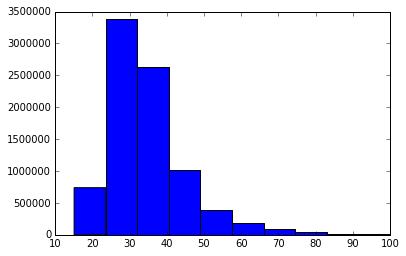

In [81]:
#임의로 % identical match 값을 기준으로 분석 시도

import matplotlib.pyplot as plt

plt.hist(df_blast['pident'])
plt.show()

In [82]:
#% identical match 값이 높은 것을 분석 시도

cut = np.percentile(df_blast['pident'], 99.9)

In [88]:
m_pident = df_blast['pident'] > cut

In [89]:
df_blast[m_pident].shape

(8452, 12)

In [90]:
df_blast_mp = df_blast[m_pident]

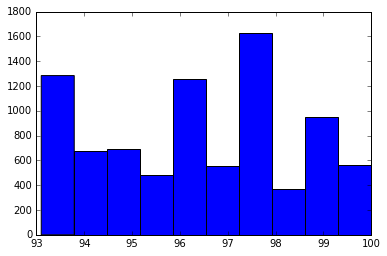

In [91]:
plt.hist(df_blast_mp['pident'])
plt.show()

In [92]:
key_list_99 = []
dic_cut_99  = {}

for x in set(df_blast_mp['qseqid']) :
    key_list_99.append(x)
    m = df_blast_mp['qseqid'] == x
    for y in df_blast_mp[m]['sseqid'] :
        key_list_99.append(y)
    for z in key_list_99 :
        try :
            value = pro_dic[z]
        except KeyError :
            value = P_pro_dic[z]
        dic_cut_99[z] = value
    GP_cut_99 = (SeqRecord(Seq(dic_cut_99[i]), i) for i in (dic_cut_99))
    SeqIO.write(GP_cut_99, './4_GP_cut_99_%s_fasta'%x, 'fasta')
    key_list_99 = []
    dic_cut_99  = {}

**clustal**

**clustal results**

* drawing tree

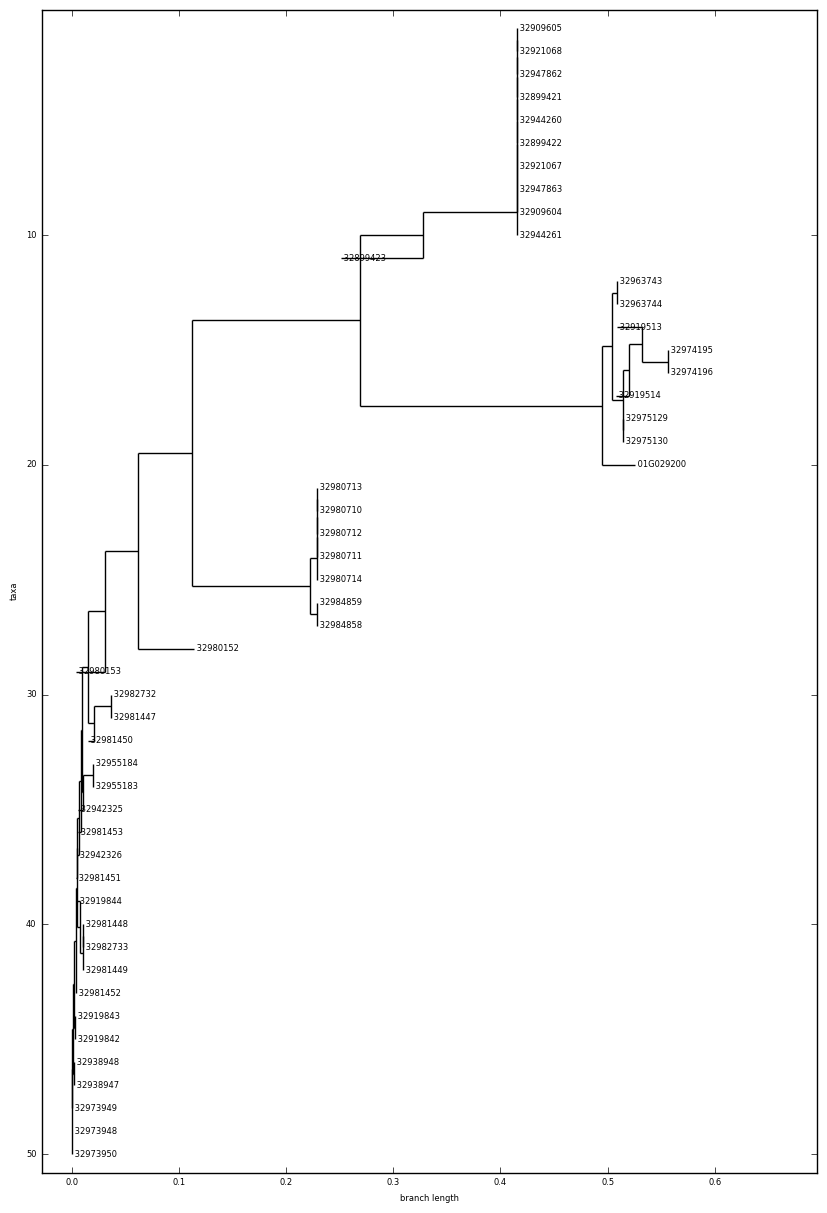

In [104]:
tree = Phylo.read('./4_GP_cut_99_01G029200_fasta_guide_tree', 'newick')
matplotlib.rc('font', size = 6)
fig = plt.figure(figsize=(10, 15), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)
plt.savefig('./4_GP_cut_99_01G029200_fasta_tree.png', dpi=100)

* compare genes

In [105]:
fasta_results = open('./4_GP_cut_99_01G029200_fasta_results')

In [106]:
fasta_results_read = fasta_results.read()

In [107]:
fasta_results_dic = {}
for x in fasta_results_read.split('\n')[3:] :
    key = x.split(' ')[0]
    value = [y for y in x.split(' ')[1:] if y != '']
    try :
        fasta_results_dic[key] += value
    except KeyError :
        fasta_results_dic[key] = value

In [112]:
fasta_results_dic

{'': ['************',
  '*********:*:***:************************',
  '*******************',
  '****',
  '.',
  '.',
  ':',
  '.'],
 '01G029200': ['------------------------------------------------------------',
  '------------------------------------------------------------',
  '------------------------------------------------------------',
  '------------------------------------------------MQIFVKTLTGKT',
  'ITLEVESSDTIDNVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLADYNIQKESTLHLVLR',
  'LRGGAKKRKKKTYTKPKKIKHKHKKVKLGILQFYKVDDSGKVQRLRKECPNAECGAGTFM',
  'ANHFDRHYCGKCGLTYVYQKADA-------------------------------------',
  '------------------------------------------------------------',
  '--------------------------------------------------------'],
 '32899421': ['------------------------------------------------------------',
  '------------------------------------------------------------',
  '------------------------------------------------------------',
  '------------------------------------------------MQI

In [113]:
del fasta_results_dic['']

#dictionary의 지우고싶은 key와 value 쌍을 key값 입력시 지워줌

In [114]:
fasta_results_dic

{'01G029200': ['------------------------------------------------------------',
  '------------------------------------------------------------',
  '------------------------------------------------------------',
  '------------------------------------------------MQIFVKTLTGKT',
  'ITLEVESSDTIDNVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLADYNIQKESTLHLVLR',
  'LRGGAKKRKKKTYTKPKKIKHKHKKVKLGILQFYKVDDSGKVQRLRKECPNAECGAGTFM',
  'ANHFDRHYCGKCGLTYVYQKADA-------------------------------------',
  '------------------------------------------------------------',
  '--------------------------------------------------------'],
 '32899421': ['------------------------------------------------------------',
  '------------------------------------------------------------',
  '------------------------------------------------------------',
  '------------------------------------------------MQIFVKTLTGKT',
  'ITLEVESSDTIDNVKTKIQDKEGIPPDQQRLIFAGKQLEDGRTLADYNIQKESTLHLVLR',
  'LRGG--IIEPSLMALARKYNQE----------KMICRKCYARLHPRAVNCR

In [115]:
for x in fasta_results_dic :
    fasta_results_dic[x] = ''.join(fasta_results_dic[x])
    
#떨어져있던 value값들을 하나의 서열이 되도록 이어줌

In [116]:
fasta_results_dic

{'01G029200': '------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------MQIFVKTLTGKTITLEVESSDTIDNVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLADYNIQKESTLHLVLRLRGGAKKRKKKTYTKPKKIKHKHKKVKLGILQFYKVDDSGKVQRLRKECPNAECGAGTFMANHFDRHYCGKCGLTYVYQKADA---------------------------------------------------------------------------------------------------------------------------------------------------------',
 '32899421': '------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------MQIFVKTLTGKTITLEVESSDTIDNVKTKIQDKEGIPPDQQRLIFAGKQLEDGRTLADYNIQKESTLHLVLRLRGG--IIEPSLMALARKYNQE----------KMICRKCYARLHPRAVNCRKKKCG-------------HSNQLRPKKKIK---------------------------------------------------

![01G029200_tree]('./photo/01G029200_tree.PNG')

In [128]:
#한 query를 기준으로 clustal 한 것이기때문에 길이는 동일, 각 자리마다의 서열이 다른 것이기 때문에 긴 서열들을 한자리씩 비교해야 한다.
#따라서 한 요소마다 list에 넣어준다.

test_far_seq    = []
test_close1_seq = []
test_close2_seq = []
test_query_seq  = []

[test_far_seq.append(x) for x in fasta_results_dic['32973950']]
[test_close1_seq.append(x) for x in fasta_results_dic['32974195']]
[test_close2_seq.append(x) for x in fasta_results_dic['32974196']]
[test_query_seq.append(x) for x in fasta_results_dic['01G029200']]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [130]:
test_query_seq

#한 자리씩 list의 요소가 되었다.

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-'

In [131]:
len(test_far_seq), len(test_close1_seq), len(test_close2_seq), len(test_query_seq)

#한 query를 기준으로 clustal 한 것이므로 길이가 동일함을 알 수 있다.

(536, 536, 536, 536)

In [132]:
green_vs_red1  = sum(1 for i, j in zip(test_far_seq, test_close1_seq) if i != j)
green_vs_red2  = sum(1 for i, j in zip(test_far_seq, test_close2_seq) if i != j)
red1_vs_red2   = sum(1 for i, j in zip(test_close1_seq, test_close2_seq) if i != j)
query_vs_red1  = sum(1 for i, j in zip(test_query_seq, test_close1_seq) if i != j)
query_vs_green = sum(1 for i, j in zip(test_query_seq, test_far_seq) if i != j)

In [133]:
green_vs_red1, green_vs_red2, red1_vs_red2, query_vs_red1, query_vs_green

(295, 295, 0, 49, 301)

In [147]:
compare_dic = {'green_vs_red1' : green_vs_red1, 'green_vs_red2' : green_vs_red2, 'red1_vs_red2' : red1_vs_red2, 'query_vs_red1' : query_vs_red1, 'query_vs_green' : query_vs_green}

In [148]:
compare_dic

{'green_vs_red1': 295,
 'green_vs_red2': 295,
 'query_vs_green': 301,
 'query_vs_red1': 49,
 'red1_vs_red2': 0}

In [167]:
Degree_of_agreement_dic = {}
for key in compare_dic :
    Degree_of_agreement_dic[key] = str(int(((len(test_query_seq) - compare_dic[key])/len(test_query_seq))*100)) + ' %'

In [169]:
Degree_of_agreement_dic

#임의로 뽑아 분석해보았을 때, query와 가까울 수록 sequence 일치도가 높고,  query와 멀 수록 sequence 일치도가 떨어졌다.

{'green_vs_red1': '44 %',
 'green_vs_red2': '44 %',
 'query_vs_green': '43 %',
 'query_vs_red1': '90 %',
 'red1_vs_red2': '100 %'}

**prank**

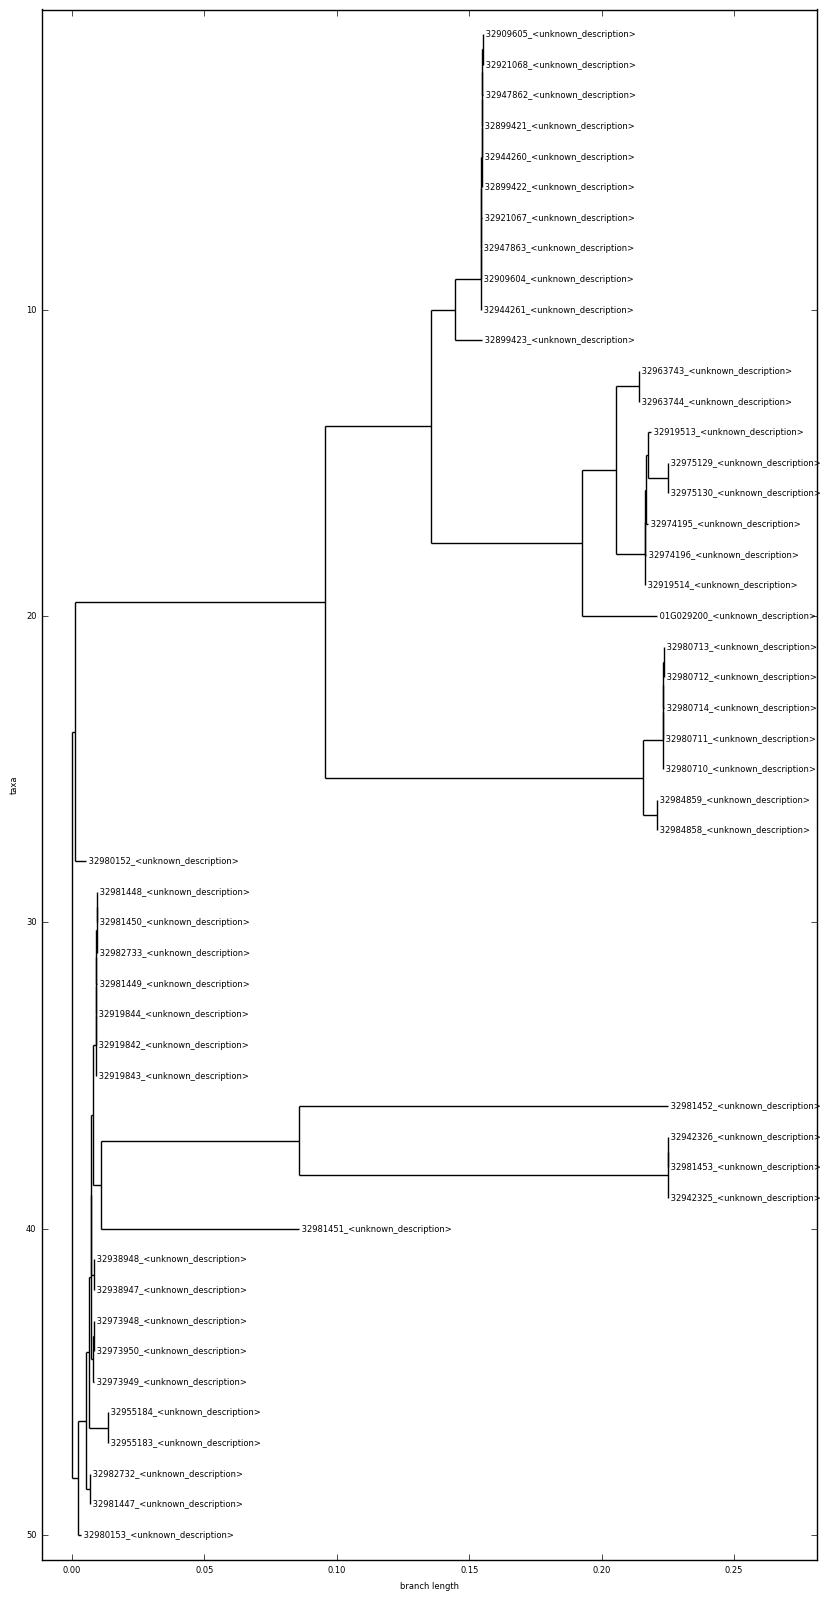

In [170]:
import matplotlib
import matplotlib.pyplot as plt
from Bio import Phylo

tree = Phylo.read('./output.best.dnd', 'newick')
matplotlib.rc('font', size = 6)
fig = plt.figure(figsize=(10, 20), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)
plt.savefig('./4_GP_cut_99_01G029200_fasta_tree.png', dpi=100)

![prank_tree]('./photo/01G029200_prank_tree.PNG')

In [171]:
prank_fasta_results = open('./output.best.fas')

In [172]:
prank_fasta_results_read = prank_fasta_results.read()

In [178]:
''.join(prank_fasta_results_read.split('\n')).split('>')[0:10]

['',
 '32909605_<unknown_description',
 '---------------------------------------------------------------------------------------------------------------------MQIFVKTLTGKTITLEVESSDTIDNVKTKIQDKEGIPPDQQRLIFAGKQLEDGRTLADYNIQKESTLHLVLRLRGGIIEPSLMAL-----------------------------------------------------ARK---YNQEK-------MI-------------------------------------------------CRKC-------------------------------------------YA---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------RLHPRAVNCRKKKCGHSNQLRPKKKIKX',
 '32921068_<unknown_description',
 '---------------------------------------------------------------------------------------------------------------------MQIFVKTLTGKTITLEVESSDTIDNVKTKIQDKEGIPPDQQRLIFAGKQLEDGRTLADYNIQKESTLHLVLRLRG

In [179]:
prank_fasta_results_read_split = ''.join(prank_fasta_results_read.split('\n')).split('>')[1:]

In [180]:
prank_fasta_results_dic = {}
for x in range(int(len(prank_fasta_results_read_split)/2)) :
    prank_fasta_results_dic[prank_fasta_results_read_split[x*2].split('_')[0]] = prank_fasta_results_read_split[x*2+1]

In [182]:
prank_fasta_results_dic

{'01G029200': '---------------------------------------------------------------------------------------------------------------------MQIFVKTLTGKTITLEVESSDTIDNVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLADYNIQKESTLHLVLRLRGG-------AK-----------------------------------------------------KRKKKTYTKPK-------KIKHKHKKVKLGILQFYKVDDSGKVQRLRKECPNAECGAGTFMANHFDRHYCGKCGLTYVYQKADA--------------------------------X--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------',
 '32899421': '---------------------------------------------------------------------------------------------------------------------MQIFVKTLTGKTITLEVESSDTIDNVKTKIQDKEGIPPDQQRLIFAGKQLEDGRTLADYNIQKESTLHLVLRLRGGIIEPSLMAL--------------------------------------

In [190]:
prank_test_far_seq    = []
prank_test_close1_seq = []
prank_test_close2_seq = []
prank_test_query_seq  = []

[prank_test_far_seq.append(x) for x in prank_fasta_results_dic['32980153']]
[prank_test_close1_seq.append(x) for x in prank_fasta_results_dic['32963743']]
[prank_test_close2_seq.append(x) for x in prank_fasta_results_dic['32963744']]
[prank_test_query_seq.append(x) for x in prank_fasta_results_dic['01G029200']]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [191]:
prank_test_query_seq

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'M',
 'Q',
 'I',
 'F',
 'V',
 'K',
 'T',
 'L',
 'T',
 'G',
 'K',
 'T',
 'I',
 'T',
 'L',
 'E',
 'V',
 'E',
 'S',
 'S',
 'D',
 'T',
 'I',
 'D',
 'N',
 'V',
 'K',
 'A',
 'K',
 'I',
 'Q',
 'D',
 'K',
 'E',
 'G',
 'I',
 'P',
 'P',
 'D',
 'Q',
 'Q',
 'R',
 'L',
 'I',
 'F',
 'A',
 'G',
 'K',
 'Q',
 'L'

In [192]:
len(prank_test_far_seq), len(prank_test_close1_seq), len(prank_test_close2_seq), len(prank_test_query_seq)

(728, 728, 728, 728)

In [193]:
prank_green_vs_red1  = sum(1 for i, j in zip(prank_test_far_seq, prank_test_close1_seq) if i != j)
prank_green_vs_red2  = sum(1 for i, j in zip(prank_test_far_seq, prank_test_close2_seq) if i != j)
prank_red1_vs_red2   = sum(1 for i, j in zip(prank_test_close1_seq, prank_test_close2_seq) if i != j)
prank_query_vs_red1  = sum(1 for i, j in zip(prank_test_query_seq, prank_test_close1_seq) if i != j)
prank_query_vs_green = sum(1 for i, j in zip(prank_test_query_seq, prank_test_far_seq) if i != j)

In [194]:
prank_green_vs_red1, prank_green_vs_red2, prank_red1_vs_red2, prank_query_vs_red1, prank_query_vs_green

(138, 138, 0, 9, 140)

In [198]:
prank_compare_dic = {'prank_green_vs_red1' : prank_green_vs_red1, 'prank_green_vs_red2' : prank_green_vs_red2, 'prank_red1_vs_red2' : prank_red1_vs_red2, 'prank_query_vs_red1' : prank_query_vs_red1, 'prank_query_vs_green' : prank_query_vs_green}

In [199]:
prank_compare_dic

{'prank_green_vs_red1': 138,
 'prank_green_vs_red2': 138,
 'prank_query_vs_green': 140,
 'prank_query_vs_red1': 9,
 'prank_red1_vs_red2': 0}

In [200]:
prank_Degree_of_agreement_dic = {}
for key in prank_compare_dic :
    prank_Degree_of_agreement_dic[key] = str(int(((len(prank_test_query_seq) - prank_compare_dic[key])/len(prank_test_query_seq))*100)) + ' %'

In [202]:
prank_Degree_of_agreement_dic

#임의로 뽑아 분석해보았을 때, query와 가까울 수록 sequence 일치도가 높고,  query와 멀 수록 sequence 일치도가 떨어졌다.

{'prank_green_vs_red1': '81 %',
 'prank_green_vs_red2': '81 %',
 'prank_query_vs_green': '80 %',
 'prank_query_vs_red1': '98 %',
 'prank_red1_vs_red2': '100 %'}

---